<a href="https://colab.research.google.com/github/PranitShrivas/Classification_Model/blob/main/Classification_Model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TCS iON-RIO-125_Internship_**PRANIT_MANOJ_SHRIVAS**

In [ ]:
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import altair as alt
import itertools
import keras
import math
import re
import string
import spacy
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Loading Dataset

In [ ]:
df = pd.read_csv('/content/webmd (1).csv')

In [ ]:
df

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0.0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0.0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31454,19-24,Repeated Episodes of Anxiety,8/4/2010,lexapro,63990,5,5,About 7 months ago I was having really bad Anx...,5,Female,"Nausea , dry mouth , trouble sleeping , con...",1.0
31455,55-64,Underactive Thyroid,7/24/2009,levothyroxine sodium,1433,4,3,Have been on this for over 20 years. I feel li...,3,Male,Hair loss may occur during the first few mont...,9.0
31456,45-54,Other,7/30/2009,levothyroxine solution,1433,5,1,"after taking treatment for 90 days, my have sl...",1,Male,Hair loss may occur during the first few mont...,0.0
31457,45-54,Bipolar Depression,8/3/2010,lexapro,63990,5,5,It makes me calm. Takes the edge off feeling s...,5,Female,"Nausea , dry mouth , trouble sleeping , con...",3.0


In [ ]:
df.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0.0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0.0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31459 entries, 0 to 31458
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            31459 non-null  object 
 1   Condition      31459 non-null  object 
 2   Date           31459 non-null  object 
 3   Drug           31459 non-null  object 
 4   DrugId         31459 non-null  int64  
 5   EaseofUse      31459 non-null  int64  
 6   Effectiveness  31459 non-null  int64  
 7   Reviews        31455 non-null  object 
 8   Satisfaction   31459 non-null  int64  
 9   Sex            31459 non-null  object 
 10  Sides          31459 non-null  object 
 11  UsefulCount    31458 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 2.9+ MB


In [ ]:
df.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount'],
      dtype='object')

In [ ]:
df.shape

(31459, 12)

In [ ]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,31459.000000,31459.000000,31459.000000,31459.000000,31458.000000
mean,35158.366096,4.009345,3.450904,2.982167,7.517039
std,49940.960062,1.310293,1.443237,1.604489,9.008516
min,73.000000,1.000000,1.000000,1.000000,0.000000
25%,6616.000000,3.000000,2.000000,1.000000,1.000000
50%,6873.000000,5.000000,4.000000,3.000000,5.000000
75%,63990.000000,5.000000,5.000000,5.000000,11.000000
max,177356.000000,5.000000,5.000000,5.000000,140.000000


In [ ]:
pip install mimesis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 14.8 MB/s eta 0:00:00


Addition of Name and Race columns

In [ ]:
from mimesis import Person
person = Person('en')
def fake_names(n):
   name = []
   for _ in range(0, n):
        name.append(person.name())
   return name
names = fake_names(362806)
data_name = pd.DataFrame(list(zip(names)),columns = ['Name'])
data_name.head()

,Name
0,Jesus
1,Jene
2,Antony
3,Leigha
4,Darlena


In [ ]:
options = ["White", "Hispanic", "Black", "Asian"]
probabilities = [0.32, 0.28, 0.22, 0.18]

# Generate synthetic data for the "Race" column
data_race = pd.DataFrame(np.random.choice(options, size=362806, p=probabilities), columns=['Race'])

# Display the first few rows of the DataFrame
data_race.head(7)

,Race
0,White
1,Asian
2,Black
3,Black
4,Asian
5,Asian
6,Black


In [ ]:
df2 = pd.concat([data_name, data_race, df], axis=1).reindex(df.index)
df2.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Jesus,White,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724.0,5.0,5.0,I'm a retired physician and of all the meds I ...,5.0,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0.0
1,Jene,Asian,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724.0,5.0,5.0,cleared me right up even with my throat hurtin...,5.0,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1.0
2,Antony,Black,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731.0,2.0,3.0,why did my PTINR go from a normal of 2.5 to ov...,3.0,Female,,0.0
3,Leigha,Black,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731.0,2.0,2.0,FALLING AND DON'T REALISE IT,1.0,Female,,0.0
4,Darlena,Asian,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731.0,1.0,1.0,My grandfather was prescribed this medication ...,1.0,Male,,1.0


**ready for EDA and Preprocessing.**

In [ ]:
df3 = df2[df2.DrugId == 6873]

Missing Value Handling

In [ ]:
df3.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          4
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
#NA rows will be dropped
df3.dropna(axis = 0, inplace = True)
df3.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# Handling instances with whitespaces
for i in df3:
    df3[i]=np.where(df3[i]==" ",np.NAN,df3[i])

df3.isna().sum()

Name                0
Race                0
Age               270
Condition           0
Date                0
Drug                0
DrugId              0
EaseofUse           0
Effectiveness       0
Reviews          1562
Satisfaction        0
Sex               494
Sides               0
UsefulCount         0
dtype: int64

In [ ]:
df3.dropna(axis=0, inplace = True)
df3.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [ ]:
# Handling instances with double whitespaces
for i in df3:
    df3[i]=np.where(df3[i]=="  ",np.NAN,df3[i])

df3.isna().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

To ckeck values of each columns

In [ ]:
#Sex
df3.Sex.value_counts()

Female    4060
Male      2466
Name: Sex, dtype: int64

In [ ]:
#Age
df3.Age.value_counts()

55-64         1912
45-54         1760
65-74         1148
35-44          858
75 or over     490
25-34          306
19-24           44
13-18            6
0-2              2
Name: Age, dtype: int64

In [ ]:
df3['Year'] = pd.to_datetime(df3['Date'], errors='coerce').dt.year
df3['Month'] = pd.to_datetime(df3['Date'], errors='coerce').dt.month
df3['day_of_week'] = pd.to_datetime(df3['Date'], errors='coerce').dt.day_name()

**by extracting information from a column named 'Date' and creating three new columns: 'Year', 'Month', and 'day_of_week'.**

In [ ]:
df3.head(4)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Year,Month,day_of_week
9203,Bruna,Black,75 or over,High Blood Pressure,2/8/2020,lisinopril solution,6873.0,5.0,4.0,I have developed a very itch rash on my body f...,4.0,Female,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020,2,Saturday
9209,Laurence,White,55-64,High Blood Pressure,1/14/2020,lisinopril solution,6873.0,4.0,5.0,"tried alternative medicine Beet root, hibiscus...",4.0,Male,"Dizziness , lightheadedness , tiredness, or ...",3.0,2020,1,Tuesday
9215,Sal,White,65-74,High Blood Pressure,10/17/2019,lisinopril solution,6873.0,5.0,5.0,Have been taking 10 mg doses per day for over ...,5.0,Male,"Dizziness , lightheadedness , tiredness, or ...",6.0,2019,10,Thursday
9221,Maria,White,55-64,High Blood Pressure,10/13/2019,lisinopril solution,6873.0,2.0,4.0,I don't like that I'm taking this and not know...,2.0,Male,"Dizziness , lightheadedness , tiredness, or ...",12.0,2019,10,Sunday


#Year, Month and Day of week column generated

5.09650737167029

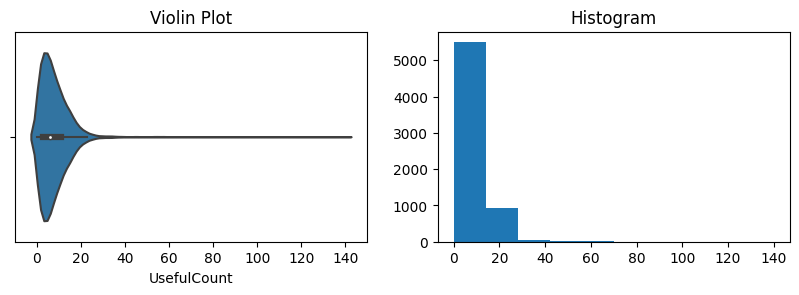

In [ ]:
#UsefulCount
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.violinplot(x=df3["UsefulCount"])
plt.title("Violin Plot")

plt.subplot(2, 2, 2)
plt.hist(df3["UsefulCount"])
plt.title("Histogram")
df3["UsefulCount"].skew()

0.13539917023288633

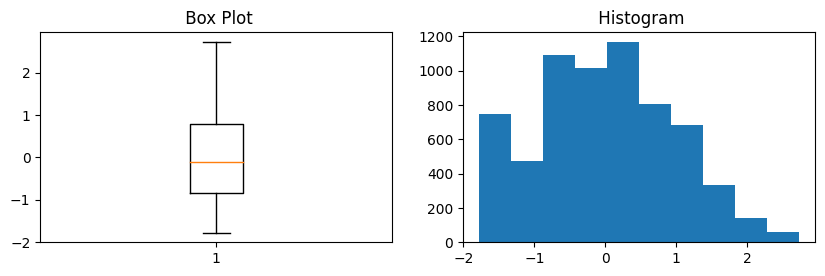

In [ ]:
data_Usefulcount = pd.DataFrame(df3['UsefulCount'])

scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data_Usefulcount1 = pipeline.fit_transform(data_Usefulcount)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_Usefulcount1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_Usefulcount1)
plt.title(" Histogram")

df3['UsefulCount_boxcox'] = data_Usefulcount1
df3['UsefulCount_boxcox'].skew()

Text(0.5, 1.0, 'Log Transformation - Histogram')

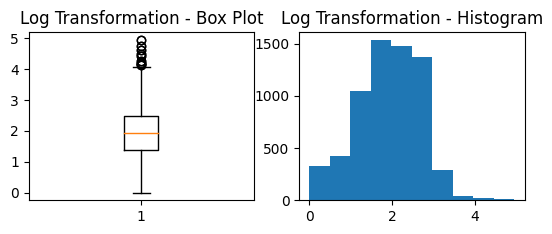

In [ ]:
data_Usefulcount_log = np.log1p(data_Usefulcount)

plt.subplot(2, 2, 3)
plt.boxplot(data_Usefulcount_log)
plt.title("Log Transformation - Box Plot")

plt.subplot(2, 2, 4)
plt.hist(data_Usefulcount_log)
plt.title("Log Transformation - Histogram")

-1.0956719032464681

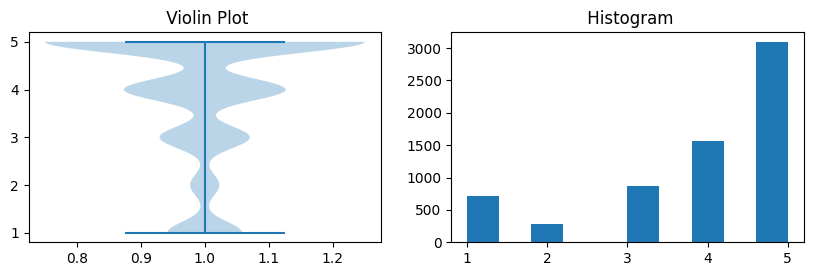

In [ ]:
#EaseofUse
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.violinplot(df3["EaseofUse"])
plt.title(" Violin Plot")

plt.subplot(2,2,2)
plt.hist(df3["EaseofUse"])
plt.title(" Histogram")
df3.EaseofUse.skew()

-0.4695297334699221

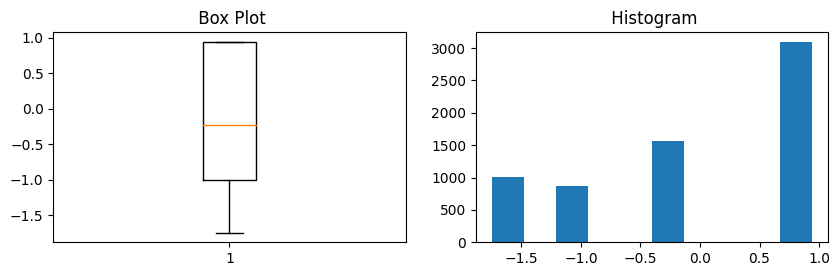

In [ ]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
pipeline = Pipeline(steps=[('s', scaler),('p', power)])

data_EaseofUse = pd.DataFrame(df3['EaseofUse'])
data_EaseofUse1 = pipeline.fit_transform(data_EaseofUse)

plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(data_EaseofUse1)
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(data_EaseofUse1)
plt.title(" Histogram")

df3['EaseofUse_boxcox'] = data_EaseofUse1
df3.EaseofUse_boxcox.skew()

0.46899147382396195

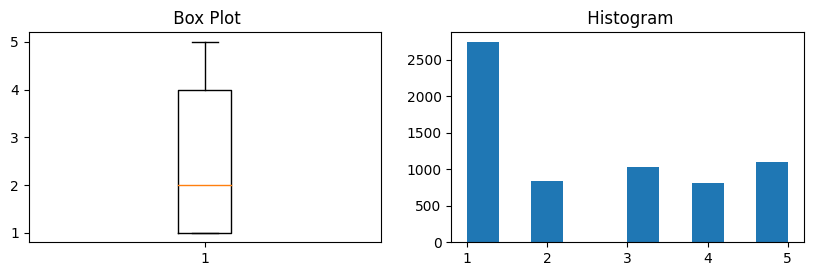

In [ ]:
#Satisfaction column
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.boxplot(df3["Satisfaction"])
plt.title(" Box Plot")

plt.subplot(2,2,2)
plt.hist(df3["Satisfaction"])
plt.title(" Histogram")
df3.Satisfaction.skew()

-0.35269982353771245

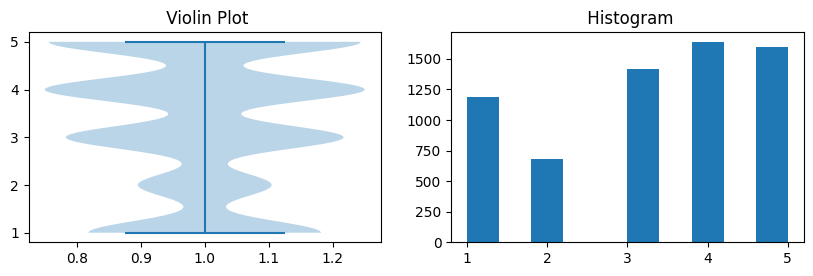

In [ ]:
#Effectiveness
plt.figure(figsize=(10,6))

plt.subplot(2,2,1)
plt.violinplot(df3["Effectiveness"])
plt.title(" Violin Plot")

plt.subplot(2,2,2)
plt.hist(df3["Effectiveness"])
plt.title(" Histogram")
df3.Effectiveness.skew()

**Skewness and outliers, Usefulcount, easeofuse, effectiveness and satisfaction column has been checked.**

#Sideeffect:

In [ ]:
mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
df3['Sideeffect'] = df3['Satisfaction'].replace(mapping)

In [ ]:
df3.columns

Index(['Name', 'Race', 'Age', 'Condition', 'Date', 'Drug', 'DrugId',
       'EaseofUse', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex', 'Sides',
       'UsefulCount', 'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect'],
      dtype='object')

#EDA - Exploratory Data Analysis:

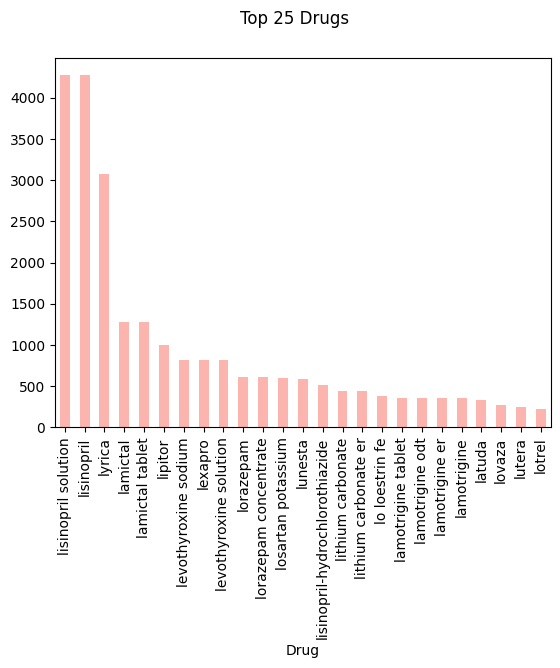

In [ ]:
df_pivot = df.pivot_table(index='Drug', aggfunc='size').sort_values(ascending=False).head(25)
df_pivot.plot(kind='bar', stacked=True, colormap='Pastel1')
plt.suptitle("Top 25 Drugs")
plt.xticks(rotation=90, fontsize=10)
plt.show()

Lisinopril solution tops the list followed by Lisinopril. Please noted that all the 25 drugs has been used by more than atleast 600 people.

Top 15 Conditions:

Text(0, 0.5, 'Users')

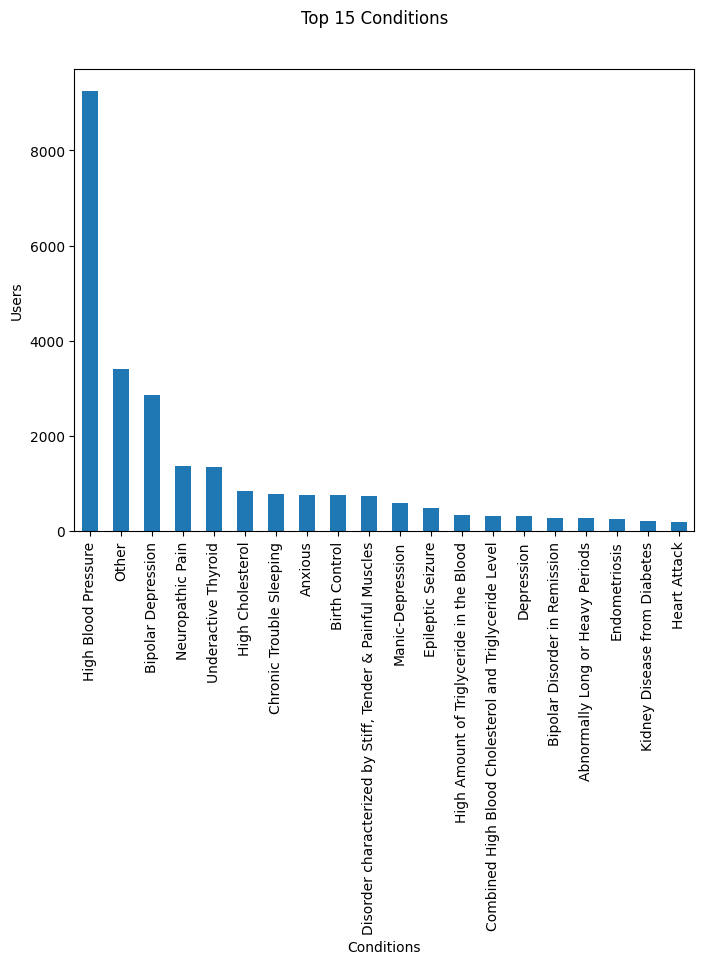

In [ ]:
df['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(8,6))
plt.suptitle("Top 15 Conditions")
plt.xlabel('Conditions')
plt.ylabel('Users')

As much as 10,000 users have reported High blood pressure conditions followed by other topped the list with more than 3000 people reporting it.

#EDA on Licinopril:

Which gender is the predominant user?

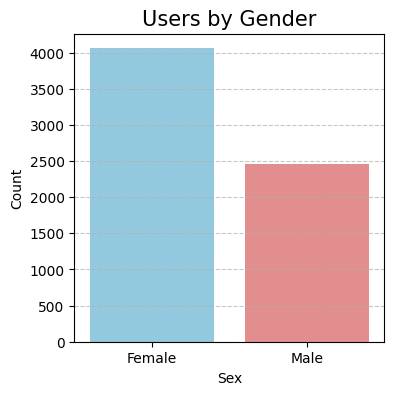

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Sex', data=df3, palette=['skyblue', 'lightcoral'])
plt.title('Users by Gender', fontsize=15)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Female users are predominant

Which race is the predominant user?

Text(0, 0.5, 'Count')

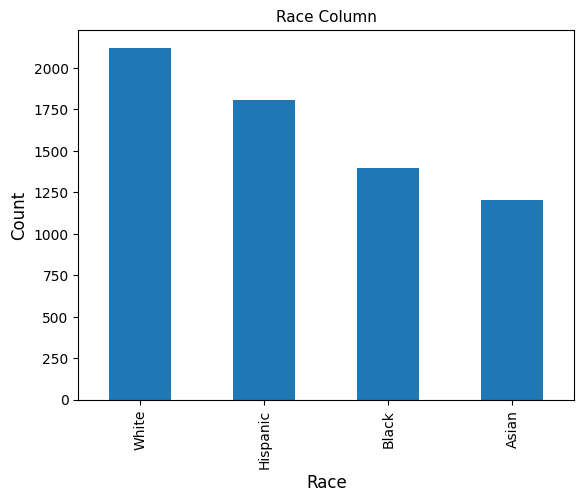

In [ ]:
df3['Race'].value_counts().plot(kind='bar')
plt.title("Race Column", fontsize = 11)
plt.xlabel("Race", fontsize = 12)
plt.ylabel("Count", fontsize = 12)

White is predominant user in race column

In each race, which gender is the predominant user?

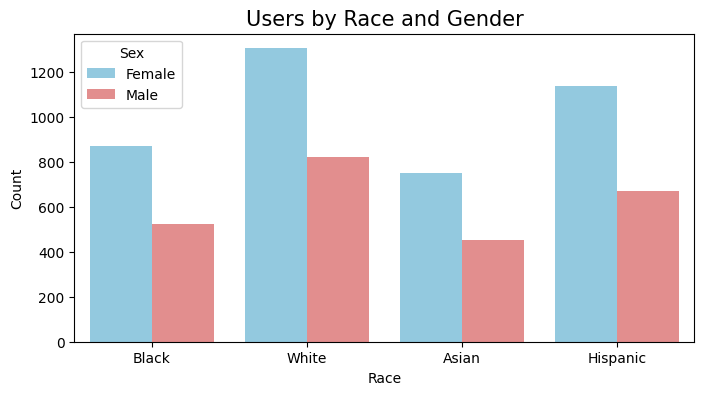

In [ ]:
custom_palette = ['skyblue', 'lightcoral']
plt.figure(figsize=(8, 4))
sns.countplot(x='Race', hue='Sex', data=df3, palette=custom_palette)
plt.title("Users by Race and Gender", fontsize=15)
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

In each age group, which gender is the predominant user?

Text(0.5, 1.0, 'Users by Age and Gender')

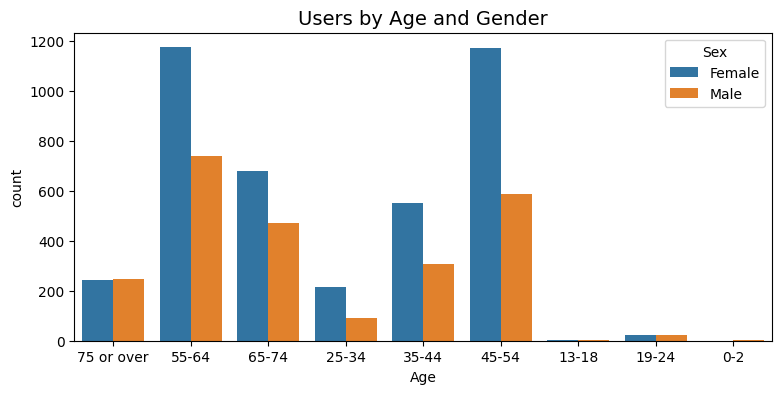

In [ ]:
plt.figure(figsize=(9, 4))
sns.countplot(x='Age',hue='Sex',data=df3)
plt.title("Users by Age and Gender", fontsize = 14)

Age group {55-64} & {45-54},In this 2 group female seems to be more predominanat

In each year, how many reviews were collected?

Text(0, 0.5, 'Count of Reviews')

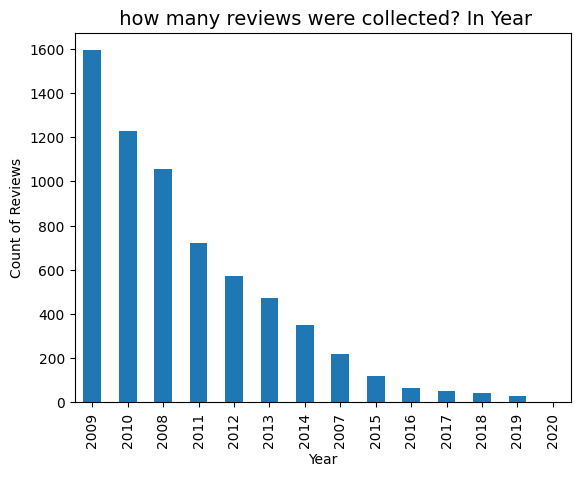

In [ ]:
df3['Year'].value_counts().plot(kind='bar')
plt.title(" how many reviews were collected? In Year", fontsize = 14)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

2009 was the year, In which most reviews were collected/given by people

In each year, there is a gradual decrease in user reviews

Text(0, 0.5, 'Count of Reviews')

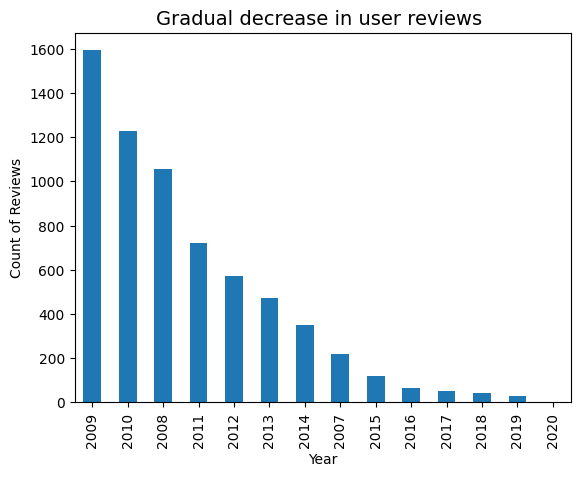

In [ ]:
df3['Year'].value_counts().plot(kind='bar')
plt.title("Gradual decrease in user reviews ", fontsize = 14)
plt.xlabel("Year", fontsize = 10)
plt.ylabel("Count of Reviews", fontsize = 10)

2020 has no review and 2019 has lowest reviews in the year



how effective is the drug?

Text(0, 0.5, 'Count')

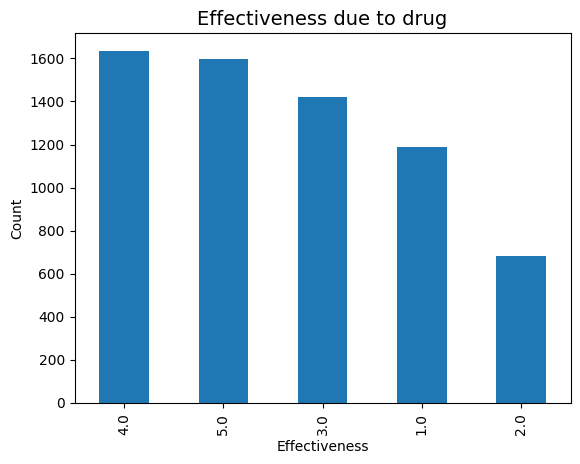

In [ ]:
df3['Effectiveness'].value_counts().plot(kind='bar')
plt.title("Effectiveness due to drug", fontsize = 14)
plt.xlabel("Effectiveness", fontsize = 10)
plt.ylabel("Count", fontsize = 10)

The drug is fairly effective with around 1600 users voting a 4 rating to it

How effective is the drug among both the gender category?

<Figure size 1000x800 with 0 Axes>

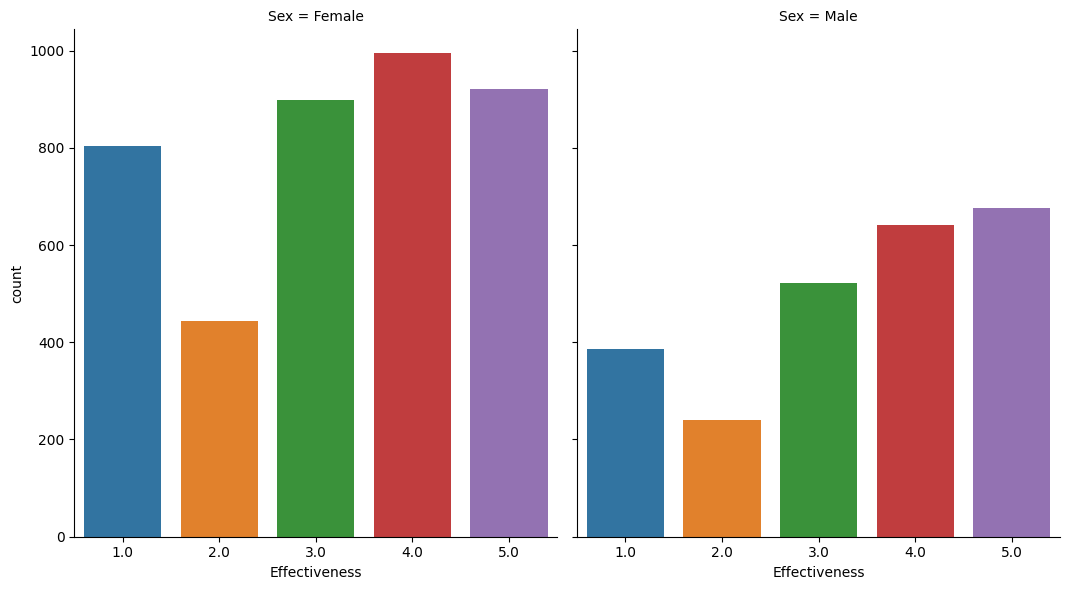

In [ ]:
plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=df3, kind="count",
                height=6,aspect =.9);


Both the users have given a mixed response

How many reported side effects for the drug?

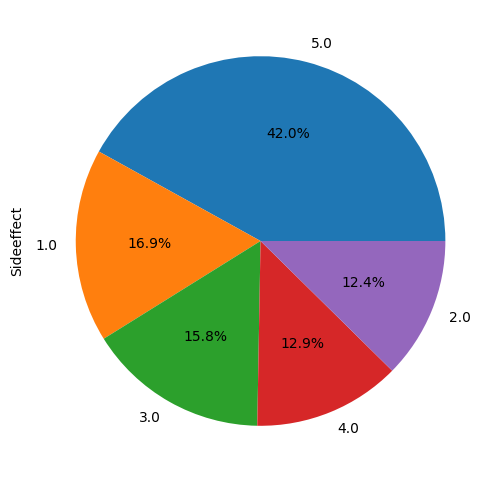

In [ ]:
plt.figure(figsize=(6,6))
df3['Sideeffect'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

42% users reported extreme sideeffects with 1 represent no side effect and 5 represent extreme side effect

Which age group has reported most side effect?

<Axes: xlabel='Age', ylabel='count'>

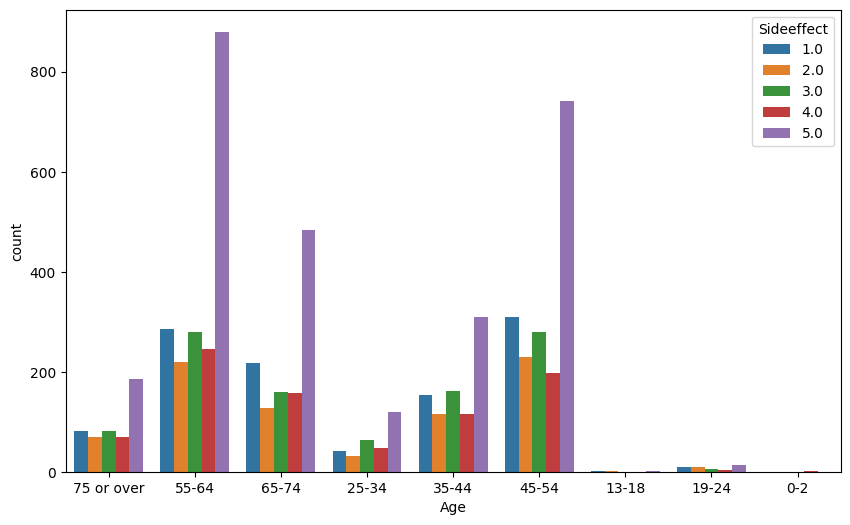

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sideeffect',data=df3)

55-64 age group has opinionated that they had extreme side effects

Among both the gender category, how is the sideeffects of the drug?

<Figure size 2000x1000 with 0 Axes>

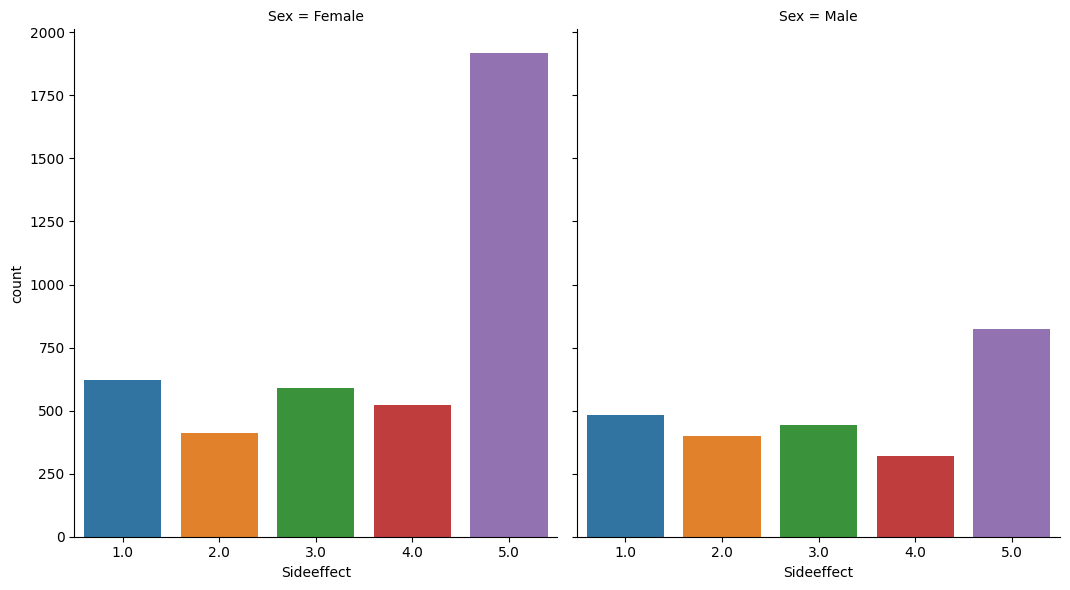

In [ ]:
plt.figure(figsize=(20,10))

g = sns.catplot(x="Sideeffect",col="Sex",data=df3, kind="count",height=6,aspect =.9);

Female users have reported more extreme side effects

which race has reported extreme side effects?

<Axes: xlabel='Race', ylabel='count'>

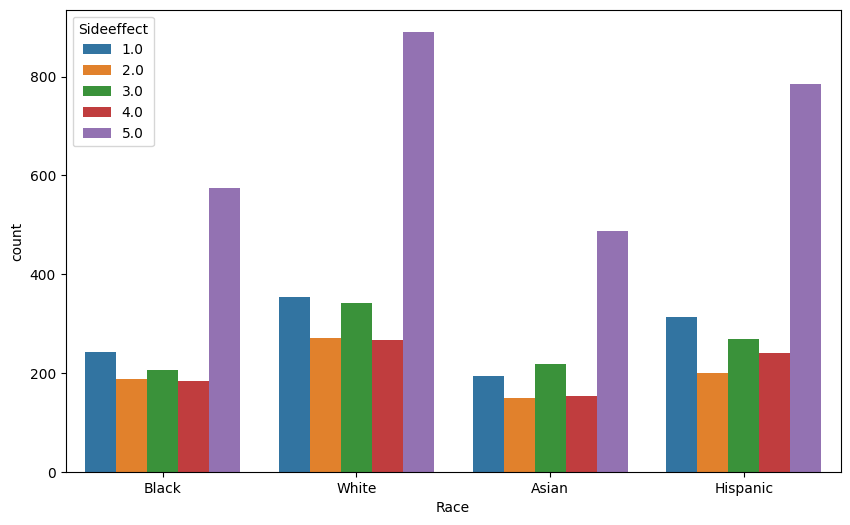

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='Sideeffect',data=df3)

White and Hispanic users reported more extreme side effects

#Reviews:

Let us look at a sample of Review

In [ ]:
df3.Reviews.sample(7)

10367    Lisinopril has reduced blood pressure readings...
17693    How long after stopping taking Lisinopril does...
12479    Caused coughing as well as my blood pressure t...
15242    Used 20mg once daily for two weeks, now have s...
11840    This med lowered my BP immediately.  HOWEVER, ...
14061    After a little expermentation 29 mg seems to w...
12024    I've been on the medication for a week and hav...
Name: Reviews, dtype: object

To enhance the meaningfulness of our review analysis, we aim to categorize reviews as either positive or negative. However, to achieve this, we require a more extensive dataset than the one currently available. The plan is to train our algorithm on a comprehensive parent dataset encompassing information about various medicines. The algorithm will undergo training using both satisfaction scores and corresponding reviews. This training process will enable the algorithm to discern which words or phrases characterize positive reviews (satisfaction > 3) and which signify negative reviews (satisfaction < 3). Subsequently, the generated model will be applied to assess the review rank, assigning a value of 1 for positive reviews and 0 for negative reviews, within our current dataset. It's important to note that the review rank for entries where satisfaction > 3 is designated as 1, while entries with satisfaction < 3 are marked as 0. For entries where satisfaction equals 3, the model will be utilized to determine the review rank values. Ultimately, this approach will contribute to a more comprehensive and insightful analysis of our dataset.

Cleaning the Global Review column

In [ ]:
if df['Reviews'].dtype.kind == "O":
        df['Reviews'] = df['Reviews'].str.strip()

In [ ]:
df['Reviews']= df['Reviews'].astype(str)

In [ ]:
import nltk

# Download stopwords
nltk.download('stopwords')

# Download punkt tokenizer
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
%%time

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])
STOPWORDS = set(sklearn_stop_words).union(set(stopwords.words("english")))

def clean_review(text, STOPWORDS=STOPWORDS, nlp=nlp):
    """Cleans up text"""

    def rep_emo(text, placeholder_pos=' happyemoticon ', placeholder_neg=' sademoticon '):
        """Replace emoticons"""
        # Credit https://github.com/shaheen-syed/Twitter-Sentiment-Analysis/blob/master/helper_functions.py
        emoticons_pos = [":)", ":-)", ":p", ":-p", ":P", ":-P", ":D",":-D", ":]", ":-]", ";)", ";-)",
                         ";p", ";-p", ";P", ";-P", ";D", ";-D", ";]", ";-]", "=)", "=-)", "<3"]
        emoticons_neg = [":o", ":-o", ":O", ":-O", ":(", ":-(", ":c", ":-c", ":C", ":-C", ":[", ":-[",
                         ":/", ":-/", ":\\", ":-\\", ":n", ":-n", ":u", ":-u", "=(", "=-(", ":$", ":-$"]

        for e in emoticons_pos:
            text = text.replace(e, placeholder_pos)

        for e in emoticons_neg:
            text = text.replace(e, placeholder_neg)
        return text

    def rep_punct(text):
        """Replace all punctuation with space"""
        for c in string.punctuation:
            text = text.replace(c, " ")
        return text

    def rem_stop_num(text):
        """Remove stop words and anything starting with number"""
        return " ".join(word for word in text.split() if word not in STOPWORDS and not word[0].isdigit())

    def lemmatize(text):
        """Return lemmas of tokens in text"""
        return " ".join(tok.lemma_.lower().strip() for tok in nlp(text) if tok.lemma_ != "-PRON-")

    return lemmatize(rem_stop_num(rep_punct(rep_emo(text))))

mldf = df[["Satisfaction", "Reviews"]]
mldf["Reviews"] = mldf["Reviews"].apply(clean_review)

# remove any rows with new empty strings following the clean-up
mldf["Reviews"].replace("", np.nan, inplace=True)
mldf.dropna(inplace=True)
# adding indexes as "index" column for later use to recreate same splits
mldf.reset_index(inplace=True)

CPU times: user 2min 23s, sys: 372 ms, total: 2min 23s
Wall time: 2min 24s


**Review column is cleaned. A new column satisfaction1 is generated which will help in identifiying postive and negative reviews for algorithm where 0 is negative, 2 is positive and 1 is neutral for satisfaction < 3, > 3 and ==3 respectively. We will omit the neutral reviews.**

In [ ]:
def relabel(x):
    return 0 if x < 3 else 1 if x == 3 else 2

mldf["Satisfaction1"] = mldf["Satisfaction"].apply(relabel)

Generating Text processing Model

In [ ]:
train_set, test_set = train_test_split(mldf, test_size=0.25, random_state=0, stratify=mldf["Satisfaction1"])
train_index = train_set.index
test_index = test_set.index
print(train_set.shape)
print(test_set.shape)

(20520, 4)
(6840, 4)


In [ ]:
%%time
train_set = train_set[train_set["Satisfaction1"] != 1]
test_set = test_set[test_set["Satisfaction1"] != 1]
print(train_set.shape)
print(test_set.shape)

vectorizer = TfidfVectorizer(max_features=2500, min_df=10, max_df=0.8)
X_train = vectorizer.fit_transform(train_set["Reviews"]).toarray()
X_test = vectorizer.transform(test_set["Reviews"]).toarray()
y_train = train_set["Satisfaction1"].values
y_test = test_set["Satisfaction1"].values

model = RandomForestClassifier(min_samples_split=6, random_state=0)
model.fit(X_train, y_train)

acc_train = accuracy_score(y_train, model.predict(X_train))
print(f"\nAccuracy in train set: {acc_train:.2}")
predictions = model.predict(X_test)
acc_test = accuracy_score(y_test, predictions)
print(f"\nAccuracy in test  set: {acc_test:.2}\n")
print(classification_report(y_test, predictions))

(17522, 4)
(5840, 4)

Accuracy in train set: 0.99

Accuracy in test  set: 0.86

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3063
           2       0.87      0.83      0.85      2777

    accuracy                           0.86      5840
   macro avg       0.86      0.86      0.86      5840
weighted avg       0.86      0.86      0.86      5840

CPU times: user 50.7 s, sys: 1.36 s, total: 52 s
Wall time: 57 s


**Got an accuracy in test set is 86%**

Let us the clean the review specific to our drug

In [ ]:
df3["Reviews"] = df3["Reviews"].apply(clean_review)

Let us the rank the reviews by creating a function for the same

In [ ]:
def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    p = model.predict(padded_text)[0]
    if (p == 0):
        return 0
    else :
        return 1

def predict_rank1(rank):
    if (rank < 3):
        return 0
    else:
        return 1

# predict_rank("I loved it")
df3['Reviews_Rank'] = df3['Satisfaction']
df3.loc[df3['Satisfaction'] < 3, 'Reviews_Rank'] = df3.loc[df['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)
df3.loc[df3['Satisfaction'] > 3, 'Reviews_Rank'] = df3.loc[df['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)
df3.loc[df3['Satisfaction'] == 3, 'Reviews_Rank'] = df3.loc[df['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)
df3['Reviews_Rank'].unique()

array([1., 0.])

In [ ]:
def predict_rank(text):
    cleaned_text = [clean_review(text)]
    padded_text = vectorizer.transform(cleaned_text)
    prediction = model.predict(padded_text)[0]
    return prediction

# Function to predict rank based on the original satisfaction rank
def predict_rank1(rank):
    if rank < 3:
        return 0
    else:
        return 1

# Create a new column "Reviews_Rank" in df3 and set it based on satisfaction values
df3['Reviews_Rank'] = df3['Satisfaction']

# Apply predict_rank1 for satisfaction values less than 3
df3.loc[df3['Satisfaction'] < 3, 'Reviews_Rank'] = df3.loc[df3['Satisfaction'] < 3, 'Reviews_Rank'].apply(predict_rank1)

# Apply predict_rank1 for satisfaction values greater than 3
df3.loc[df3['Satisfaction'] > 3, 'Reviews_Rank'] = df3.loc[df3['Satisfaction'] > 3, 'Reviews_Rank'].apply(predict_rank1)

# Apply predict_rank for satisfaction values equal to 3
df3.loc[df3['Satisfaction'] == 3, 'Reviews_Rank'] = df3.loc[df3['Satisfaction'] == 3, 'Reviews'].apply(predict_rank)

# Display unique values in the "Reviews_Rank" column
unique_values = df3['Reviews_Rank'].unique()
print("Unique Values in Reviews_Rank:", unique_values)

Unique Values in Reviews_Rank: [1. 0. 2.]


**Columns Name has unique values so will be dropped. Drug, DrugId, Condition, Date, Easeofuse, usefulcount, sides, Year will be dropped. Race, Sex, Year, Month, Dayofweek will be onehot encoded. Satisfaction will be segregated based on the values as nil, mild, moderate, sever, extreme based on values of 5, 4, 3, 2, 1 respectively. The assumption being that thet satisfaction is a parameter that gets affected by side effects in case of patients.**

In [ ]:
df3.drop(['Name','Condition','Date','Drug','DrugId','EaseofUse','Sides','UsefulCount'], axis=1, inplace = True)

In [ ]:
df3.Month = df3.Month.astype(str)
df3.Year = df3.Year.astype(str)
data_encod = df3[['Race', 'Age','Sex','Month','day_of_week']]
data_num = df3[['Effectiveness']]
print(df3.columns)

Index(['Race', 'Age', 'Effectiveness', 'Reviews', 'Satisfaction', 'Sex',
       'Year', 'Month', 'day_of_week', 'UsefulCount_boxcox',
       'EaseofUse_boxcox', 'Sideeffect', 'Reviews_Rank'],
      dtype='object')


#Encoding : One Hot Encoding

In [ ]:
data_encod = pd.get_dummies(data_encod)
data_encod

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_7,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
9203,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9209,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9215,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9227,0,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
18982,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


**Scaling : Standard Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
mm = StandardScaler()
data_num = mm.fit_transform(data_num)
data_num = pd.DataFrame(data_num, columns = ['Effectiveness'])
data_num

,Effectiveness
0,0.517259
1,1.226128
2,1.226128
3,0.517259
4,-1.609348
...,...
6521,-1.609348
6522,-1.609348
6523,1.226128
6524,-1.609348


In [ ]:
scaler = MinMaxScaler()
data_num['Effectiveness'] = scaler.fit_transform(data_num[['Effectiveness']])

# Display the modified DataFrame
data_num.head()

,Effectiveness
0,0.75
1,1.00
2,1.00
3,0.75
4,0.00


In [ ]:
df4 = data_encod
df4['Effectiveness'] = data_num.values
df4

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,Month_8,Month_9,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness
9203,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.75
9209,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.00
9215,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1.00
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.75
9227,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.00
18982,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0.00
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1.00
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0.00


**So finally what I suppose is the following features which are race, age, review rank and effectiveness can form the dataset which will predict the sideeffect of the user.**

In [ ]:
df4 = data_encod
df4['Effectiveness'] = data_num.values
df4['Reviews_Rank'] = df3.Reviews_Rank
df4['UsefulCount_boxcox'] = data_Usefulcount1
df4['EaseofUse_boxcox'] = data_EaseofUse1
df4

,Race_Asian,Race_Black,Race_Hispanic,Race_White,Age_0-2,Age_13-18,Age_19-24,Age_25-34,Age_35-44,Age_45-54,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,Effectiveness,Reviews_Rank,UsefulCount_boxcox,EaseofUse_boxcox
9203,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0.75,1.0,-0.835439,0.943255
9209,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1.00,1.0,-0.835439,-0.231105
9215,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1.00,1.0,-0.102133,0.943255
9221,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0.75,0.0,0.918562,-1.480793
9227,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0.00,0.0,1.837785,-1.004962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18981,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0.00,0.0,1.551731,-1.480793
18982,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0.00,0.0,0.918562,0.943255
18984,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1.00,1.0,-0.835439,0.943255
18985,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.00,0.0,0.631664,-1.746405


df4 form our final dataset.

In [ ]:
df5 = pd.DataFrame(df3['Sideeffect'])
df5

,Sideeffect
9203,2.0
9209,2.0
9215,1.0
9221,4.0
9227,5.0
...,...
18981,5.0
18982,5.0
18984,2.0
18985,5.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df4,df5,test_size=0.3, random_state = 99, stratify=df5)

I changed test_size to 0.3 (30% test set) and random_state to 99.

**Log Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
# solver='lbfgs',max_iter=10000
model1 = log_reg.fit(X_train,Y_train)
Y_pred_logreg = model1.predict(X_test)

#metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
print(confusion_matrix(Y_test,Y_pred_logreg))
print(accuracy_score(Y_test,Y_pred_logreg))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,Y_pred_logreg)
print(report)

[[286  28  17   0   0]
 [ 66  67 109   0   0]
 [ 23  56  46  50 135]
 [  6   0  14  34 199]
 [ 10   1   9  59 743]]
0.6006128702757916
              precision    recall  f1-score   support

         1.0       0.73      0.86      0.79       331
         2.0       0.44      0.28      0.34       242
         3.0       0.24      0.15      0.18       310
         4.0       0.24      0.13      0.17       253
         5.0       0.69      0.90      0.78       822

    accuracy                           0.60      1958
   macro avg       0.47      0.47      0.45      1958
weighted avg       0.54      0.60      0.56      1958



**SVM RBF**

In [ ]:
from sklearn.svm import SVC
svm_clf_r = SVC(kernel='rbf', degree = 6, probability=True)
svm_model = svm_clf_r.fit(X_train, Y_train)
y_pred_svmr = svm_clf_r.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_svmr))
print(accuracy_score(Y_test, y_pred_svmr))

#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_svmr)
print(report)


[[305  25   1   0   0]
 [ 93 148   1   0   0]
 [  0   0 158  11 141]
 [  0   0  41  21 191]
 [  0   0  28   8 786]]
0.7242083758937692
              precision    recall  f1-score   support

         1.0       0.77      0.92      0.84       331
         2.0       0.86      0.61      0.71       242
         3.0       0.69      0.51      0.59       310
         4.0       0.53      0.08      0.14       253
         5.0       0.70      0.96      0.81       822

    accuracy                           0.72      1958
   macro avg       0.71      0.62      0.62      1958
weighted avg       0.71      0.72      0.68      1958



**KNN**

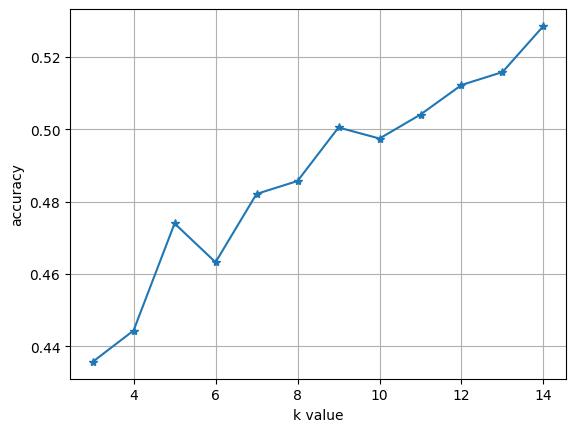

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbours = np.arange(3,15)

for k in neighbours:
        knn = KNeighborsClassifier(n_neighbors=k)
        model2 = knn.fit(X_train, Y_train)
        Y_pred_knn = model2.predict(X_test)
        acc=accuracy_score(Y_test,Y_pred_knn)
        metric_k.append(acc)

plt.plot(neighbours,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

**Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfm_clf = RandomForestClassifier(random_state = 65)
rfm_clf.fit(X_train, Y_train)
y_pred_rfm = rfm_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_rfm))
print(accuracy_score(Y_test, y_pred_rfm))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_rfm)
print(report)

[[303  28   0   0   0]
 [ 36 206   0   0   0]
 [  0   0 242   9  59]
 [  0   0  25 139  89]
 [  0   0  22  13 787]]
0.8564862104187947
              precision    recall  f1-score   support

         1.0       0.89      0.92      0.90       331
         2.0       0.88      0.85      0.87       242
         3.0       0.84      0.78      0.81       310
         4.0       0.86      0.55      0.67       253
         5.0       0.84      0.96      0.90       822

    accuracy                           0.86      1958
   macro avg       0.86      0.81      0.83      1958
weighted avg       0.86      0.86      0.85      1958



**Bagging Classifier**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier()
bag_clf.fit(X_train, Y_train)
y_pred_bag = bag_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_bag))
print(accuracy_score(Y_test, y_pred_bag))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_bag)
print(report)

[[302  29   0   0   0]
 [ 48 194   0   0   0]
 [  0   0 260  18  32]
 [  0   0  26 158  69]
 [  0   0  42  34 746]]
0.8478038815117467
              precision    recall  f1-score   support

         1.0       0.86      0.91      0.89       331
         2.0       0.87      0.80      0.83       242
         3.0       0.79      0.84      0.82       310
         4.0       0.75      0.62      0.68       253
         5.0       0.88      0.91      0.89       822

    accuracy                           0.85      1958
   macro avg       0.83      0.82      0.82      1958
weighted avg       0.85      0.85      0.85      1958



**GradientBoostingClassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
grd_clf = GradientBoostingClassifier()
grd_clf.fit(X_train, Y_train)
y_pred_grd = grd_clf.predict(X_test)
# metrics
print(confusion_matrix(Y_test, y_pred_grd))
print(accuracy_score(Y_test, y_pred_grd))


#CLassification Report
from sklearn.metrics import classification_report
report = classification_report(Y_test,y_pred_grd)
print(report)

[[275  56   0   0   0]
 [ 40 202   0   0   0]
 [  0   0 176  20 114]
 [  0   0  50  45 158]
 [  0   0  55  19 748]]
0.7385086823289071
              precision    recall  f1-score   support

         1.0       0.87      0.83      0.85       331
         2.0       0.78      0.83      0.81       242
         3.0       0.63      0.57      0.60       310
         4.0       0.54      0.18      0.27       253
         5.0       0.73      0.91      0.81       822

    accuracy                           0.74      1958
   macro avg       0.71      0.66      0.67      1958
weighted avg       0.72      0.74      0.71      1958



#Analysis Result:

**Accuracy Values of each algorithm:**

Logarithmic Regression: 60%

SVM RBF: 72%

kNN : 55%

Random forest: 86%

Bagging Classifier : 85%

GradientBoostingClassifier: 74%